In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

suppressed_values = ['s'] # In order to comply with regulations of the Family Educational Rights and Privacy Act (FERPA)
                          # on public reporting of education outcomes, groups with 5 or fewer tested students
                          # are suppressed with an “s”.
df = pd.read_csv('/content/English_Language_Arts__ELA__Test_Results_2013-2023_20250530.csv', na_values = suppressed_values)

In [ ]:
print(df.shape) # Determine the dimensions of the DataFrame

print(df.index) # View the index

(626462, 18)
RangeIndex(start=0, stop=626462, step=1)


In [ ]:
df.info() # Displays information about the DataFrame including the index Dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626462 entries, 0 to 626461
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Category         626462 non-null  object 
 1   Geographic Subdivision  626462 non-null  object 
 2   School Name             588222 non-null  object 
 3   Grade                   626462 non-null  object 
 4   Year                    626462 non-null  int64  
 5   Student Category        626462 non-null  object 
 6   Number Tested           626462 non-null  int64  
 7   Mean Scale Score        462995 non-null  float64
 8   Num Level 1             462995 non-null  float64
 9   Pct Level 1             462995 non-null  float64
 10  Num Level 2             462995 non-null  float64
 11  Pct Level 2             462995 non-null  float64
 12  Num Level 3             462995 non-null  float64
 13  Pct Level 3             462995 non-null  float64
 14  Num Level 4         

In [ ]:
df.describe() # Descriptive statistics include those that summarize the central tendency,
              # dispersion and shape of a dataset’s distribution, excluding NaN values.

,Year,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
count,626462.000000,626462.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000,462995.000000
mean,2017.662181,266.040459,420.721036,97.337444,29.335167,115.153803,32.599439,88.115710,24.553374,53.195499,13.514679,141.311209,38.067400
std,3.196494,3425.794596,139.735069,1166.027375,21.460021,1339.963396,13.193308,1011.030317,14.612338,646.231686,15.749676,1632.971148,24.656738
min,2013.000000,1.000000,193.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,10.000000,297.000000,4.000000,12.300000,7.000000,24.200000,4.000000,13.800000,1.000000,1.700000,6.000000,18.000000
50%,2017.000000,35.000000,329.000000,12.000000,25.600000,16.000000,33.300000,12.000000,24.000000,4.000000,8.200000,17.000000,35.100000
75%,2019.000000,86.000000,593.000000,31.000000,42.900000,37.000000,41.000000,30.000000,33.300000,15.000000,19.700000,46.000000,55.600000
max,2023.000000,415257.000000,650.000000,151196.000000,100.000000,154486.000000,100.000000,109742.000000,100.000000,77394.000000,100.000000,185973.000000,100.000000


In [ ]:
df['Pct Level 1 + 2'] = df['Pct Level 1'] + df['Pct Level 2'] # Add column with Total Percentage of students in level 1 and 2

df['Borough'] = df['Geographic Subdivision'].str.extract(r'([a-zA-Z])') # Extract the Borough from School Category: schools DBN

# Convert the extracted letters to its associated Borough names
df['Borough'] = df['Borough'].replace({"M": "Manhattan", "K": "Brooklyn", "Q": "Queens", "X" : "Bronx", "R": "Staten Island"})

df['District Number'] = df['Geographic Subdivision'].str.extract(r'(\d\d)') # Extract the District Number from School Category: schools DBN

df.isnull().sum() # Determine the number of missing values in each column of a DataFrame.

,0
Report Category,0
Geographic Subdivision,0
School Name,38240
Grade,0
Year,0
Student Category,0
Number Tested,0
Mean Scale Score,163467
Num Level 1,163467
Pct Level 1,163467


In [ ]:
df.groupby("Report Category").size() # Group by 'Report Category' and count the occurrences in each group

,0
Report Category,
Borough,4949
Citywide,1766
District,31525
School,588222


In [ ]:
# Conduct my research using 'Report Category'	as School (94% of data is from School) for the years 2018 - 2023
# Create a new DataFrame
df1 = df[(df['Report Category'] == 'School') & (df['Year'].isin([2018, 2019, 2020, 2021, 2022, 2023]))]
print(df1.info())
print(df1['Borough'].unique()) # View unique elements in Boroughs to cross check the info in this column

df1.isnull().sum() # Determine the number of missing values in each column of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 277205 entries, 46 to 626427
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Category         277205 non-null  object 
 1   Geographic Subdivision  277205 non-null  object 
 2   School Name             277205 non-null  object 
 3   Grade                   277205 non-null  object 
 4   Year                    277205 non-null  int64  
 5   Student Category        277205 non-null  object 
 6   Number Tested           277205 non-null  int64  
 7   Mean Scale Score        197108 non-null  float64
 8   Num Level 1             197108 non-null  float64
 9   Pct Level 1             197108 non-null  float64
 10  Num Level 2             197108 non-null  float64
 11  Pct Level 2             197108 non-null  float64
 12  Num Level 3             197108 non-null  float64
 13  Pct Level 3             197108 non-null  float64
 14  Num Level 4             

,0
Report Category,0
Geographic Subdivision,0
School Name,0
Grade,0
Year,0
Student Category,0
Number Tested,0
Mean Scale Score,80097
Num Level 1,80097
Pct Level 1,80097


In [ ]:
df1.head()

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,...,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4,Pct Level 1 + 2,Borough,District Number
46,School,02M422,QUEST TO LEARN,7,2018,Ever ELL,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan,02
93,School,06M349,HARBOR HEIGHTS,6,2022,Never ELL,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan,06
140,School,08X107,P.S. 107,3,2018,Ever ELL,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bronx,08
38243,School,01M015,P.S. 015 ROBERTO CLEMENTE,3,2023,All Students,24,455.0,4.0,16.7,...,20.8,11.0,45.8,4.0,16.7,15.0,62.5,37.5,Manhattan,01
38244,School,01M015,P.S. 015 ROBERTO CLEMENTE,4,2023,All Students,17,454.0,1.0,5.9,...,35.3,8.0,47.1,2.0,11.8,10.0,58.8,41.2,Manhattan,01


In [ ]:
# Create a new data frame with non-null values
df2 = df1.dropna() # Drop rows that contain NULL values.
df2.isnull().sum()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 197108 entries, 38243 to 626427
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Category         197108 non-null  object 
 1   Geographic Subdivision  197108 non-null  object 
 2   School Name             197108 non-null  object 
 3   Grade                   197108 non-null  object 
 4   Year                    197108 non-null  int64  
 5   Student Category        197108 non-null  object 
 6   Number Tested           197108 non-null  int64  
 7   Mean Scale Score        197108 non-null  float64
 8   Num Level 1             197108 non-null  float64
 9   Pct Level 1             197108 non-null  float64
 10  Num Level 2             197108 non-null  float64
 11  Pct Level 2             197108 non-null  float64
 12  Num Level 3             197108 non-null  float64
 13  Pct Level 3             197108 non-null  float64
 14  Num Level 4          

                    Pct Level 1 + 2
Year Borough                       
2018 Bronx                     69.8
     Brooklyn                  59.1
     Manhattan                 51.8
     Queens                    48.8
     Staten Island             46.2
2019 Bronx                     68.0
     Brooklyn                  57.2
     Manhattan                 50.0
     Queens                    47.9
     Staten Island             46.6
2022 Bronx                     69.7
     Brooklyn                  54.7
     Manhattan                 50.0
     Queens                    48.6
     Staten Island             47.1
2023 Bronx                     65.0
     Brooklyn                  50.0
     Manhattan                 44.5
     Queens                    45.0
     Staten Island             42.5


Text(0.5, 1.0, 'Average Perecentage in Level 1 and 2 Ranges')

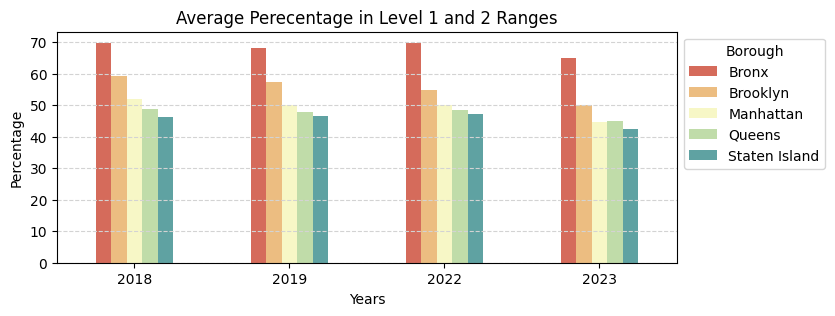

In [ ]:
# Create a new figure
plt.figure(figsize=(8, 3))

print(df2.groupby(["Year",'Borough'])[['Pct Level 1 + 2']].median())

# Plotting students in Level 1 + 2 by Year and Borough.
ax = sns.barplot(x="Year",y='Pct Level 1 + 2', hue= 'Borough', data=df2.groupby(["Year",'Borough'])[['Pct Level 1 + 2']].median(), width=0.5, palette = 'Spectral')

# Move legend Outside the Visualization
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#for container in ax.containers:
#    ax.bar_label(container, fmt='%.0f') # Rounds to one decimal place

# Add grid lines to the plot
plt.grid(axis='y', color='lightgray', linestyle='--')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Average Perecentage in Level 1 and 2 Ranges')


       Pct Level 1 + 2
Grade                 
3                 66.7
4                 68.9
5                 75.0
6                 66.6
7                 69.5
8                 59.6


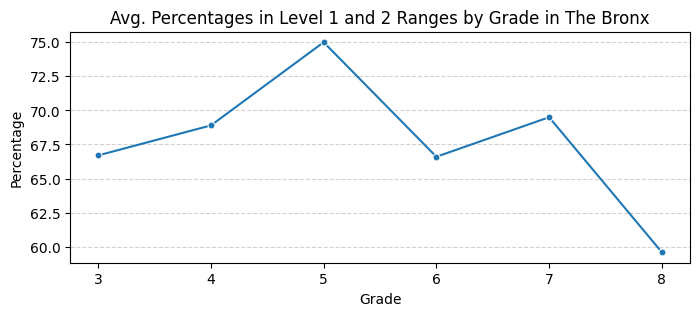

In [ ]:
# Create a new data frame with data for Bronx and grades 3 - 8
df3 = df2[(df2['Borough'] == "Bronx") & (df2['Grade'].isin(['3', '4', '5', '6', '7', '8']))]

#print(df3.info())
#print(df3.groupby(['Year','Grade'])[['Pct Level 1 + 2']].median())
print(df3.groupby(['Grade'])[['Pct Level 1 + 2']].median())

# Plot by Grades
plt.figure(figsize=(8, 3))
ax2 = sns.lineplot(x="Grade",y='Pct Level 1 + 2',  data=df3.groupby(['Grade'])[['Pct Level 1 + 2']].median(), marker='o', markersize=5)

#ax2 = sns.barplot(x="Grade",y='Pct Level 1 + 2', data=df3, width=0.5)
#ax2 = sns.lineplot(x="Year",y='Pct Level 1 + 2', hue = 'Grade', data=df3.groupby(['Year','Grade'])[['Pct Level 1 + 2']].median(), marker='o', markersize=5)
#sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))

# Add x, y labels and grid lines
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.title("Avg. Percentages in Level 1 and 2 Ranges by Grade in The Bronx")
plt.grid(axis='y', color='lightgray', linestyle='--')

plt.show()


District Number
12    73.5
07    71.4
09    70.5
08    66.7
10    66.7
11    62.5
Name: Pct Level 1 + 2, dtype: float64


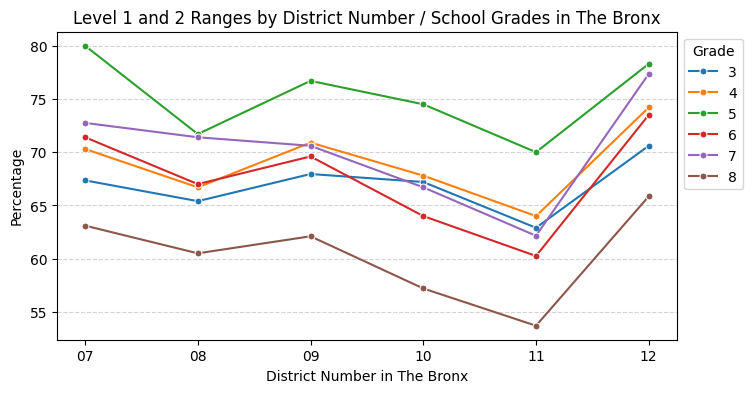

In [ ]:
# Visualization for trend lines in the Bronx by school district

plt.figure(figsize=(8, 4))

print(df3.groupby(['District Number'])['Pct Level 1 + 2'].median().sort_values(ascending=False))
ax3 = sns.lineplot(data=df3.groupby(['District Number','Grade'])[['Pct Level 1 + 2']].median(), x='District Number', y='Pct Level 1 + 2', hue = 'Grade', marker='o', markersize=5)

sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

plt.xlabel("District Number in The Bronx")
plt.ylabel("Percentage")
plt.title("Level 1 and 2 Ranges by District Number / School Grades in The Bronx")
plt.grid(axis='y', color='lightgray', linestyle='--')
plt.show()

